## Comparisons to other methods (speed, accuracy)

### PCA

Popular linear dimensionality reduction methods include PCA, or Principal Components Analysis, and MDS, Multi-Dimensional Scaling. However, issues arise in applications where low-dimensional representations of similar points must be kept close together, because these methods prioritize keeping low-dimensional representations of dissimilar points far apart. To avoid this concern and preserve local data structures, non-linear dimensionality reduction methods have been proposed as well, one of which, Stochastic Neighbor Embedding, forms the basis of this paper. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.loadtxt("Data/mnist2500_X.txt")
labels = np.loadtxt("Data/mnist2500_labels.txt")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
train = StandardScaler().fit_transform(X)
pca_res = PCA(n_components=2).fit_transform(train)

In [5]:
PCA_time = %timeit -o -r3 -n3 PCA(n_components=2).fit_transform(train)

27 ms ± 2.81 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


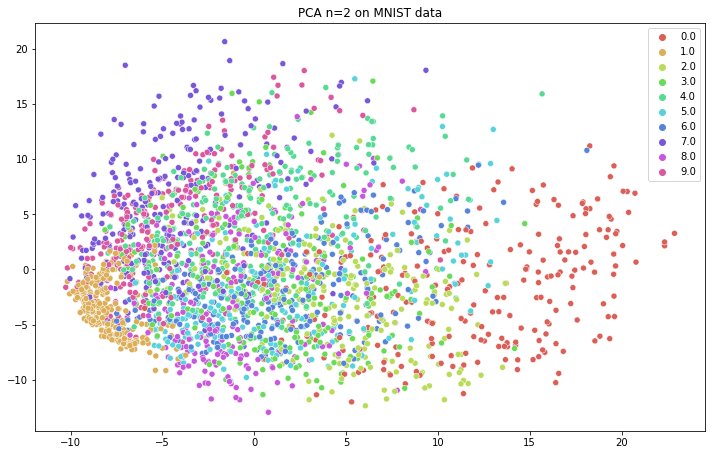

In [6]:
plt.figure(figsize=(12,7.5))
plot_PCA = sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('PCA n=2 on MNIST data')
plot_PCA.savefig("Report/Report_Plots/PCA_MNIST_plot.png")




### Isomap

In [7]:
from sklearn.manifold import Isomap

In [8]:
iso_res = Isomap(n_components=2).fit_transform(train)

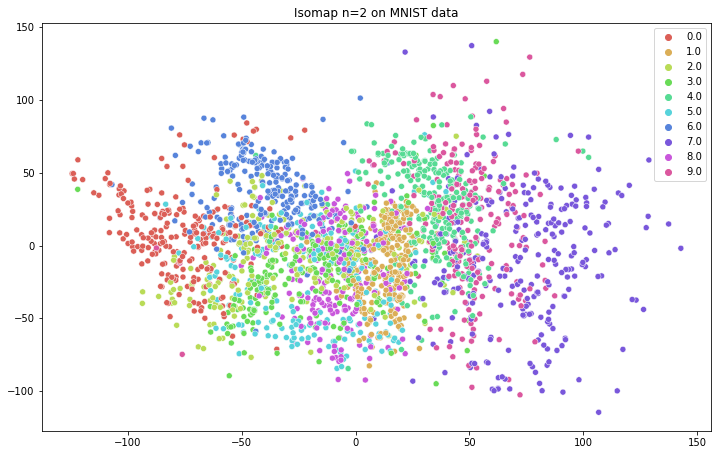

In [9]:
plt.figure(figsize=(12,7.5))
plot_iso = sns.scatterplot(x = iso_res[:,0], y = iso_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('Isomap n=2 on MNIST data')
plot_iso.savefig("Report/Report_Plots/Isomap_MNIST_plot.png")


In [10]:
Iso_time = %timeit -o -r3 -n3 Isomap(n_neighbors = 10, n_components=2).fit_transform(train)

12.4 s ± 151 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### LLE: Local Linear Embedding

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

In [12]:
lle_res = LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

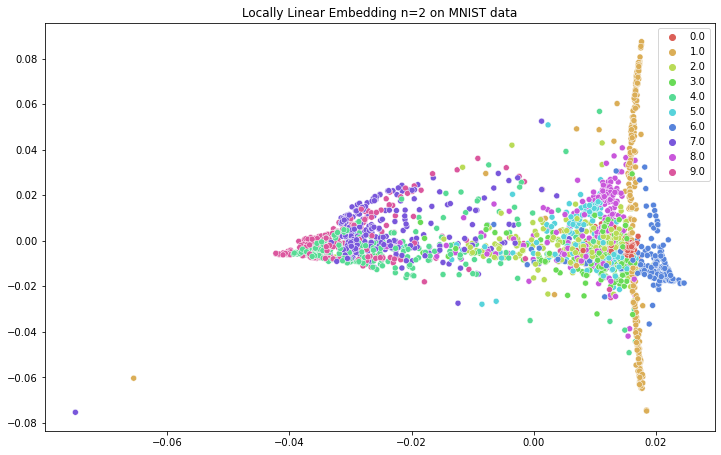

In [13]:
plt.figure(figsize=(12,7.5))
plot_lle = sns.scatterplot(x = lle_res[:,0], y = lle_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('Locally Linear Embedding n=2 on MNIST data')
plot_lle.savefig("Report/Report_Plots/LLE_MNIST_plot.png")


In [14]:
lle_time = %timeit -o -r3 -n3 LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

10.5 s ± 97.9 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### Neighborhood Components Analysis

In [15]:
from sklearn import neighbors


In [16]:
nca_res = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0).fit_transform(train, labels)


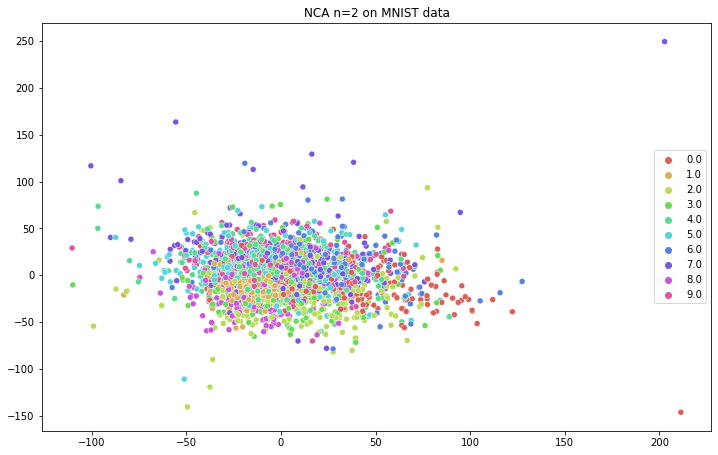

In [17]:
plt.figure(figsize=(12,7.5))
plot_nca = sns.scatterplot(x = nca_res[:,0], y = nca_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('NCA n=2 on MNIST data')
plot_nca.savefig("Report/Report_Plots/NCA_MNIST_plot.png")

In [18]:
nca_time = %timeit -o -r3 -n3 neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0).fit_transform(train, labels)


12.4 s ± 1.72 s per loop (mean ± std. dev. of 3 runs, 3 loops each)


### MDS

In [19]:
from sklearn.manifold import MDS

In [20]:
mds_res = MDS(n_components=2).fit_transform(train)

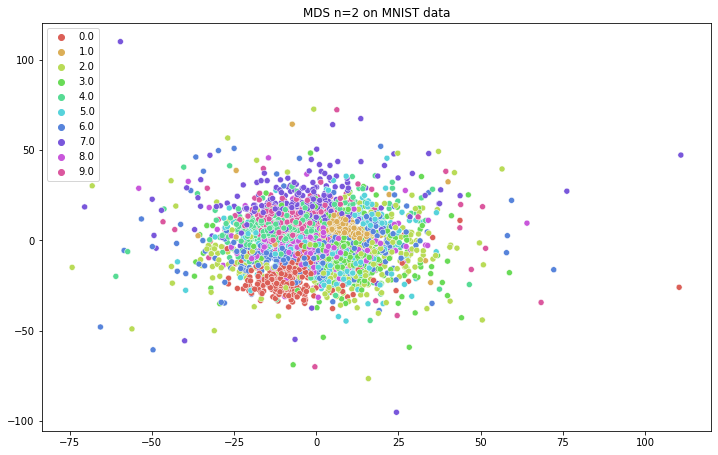

In [21]:
plt.figure(figsize=(12,7.5))
plot_mds = sns.scatterplot(x = mds_res[:,0], y = mds_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('MDS n=2 on MNIST data')
plot_mds.savefig("Report/Report_Plots/MDS_MNIST_plot.png")

In [22]:
mds_time = %timeit -o -r3 -n3 MDS(n_components=2).fit_transform(train)


2min 14s ± 1.45 s per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [26]:
# speed up multiplier
# run this after you time normal with package

types = [PCA_time, Iso_time, lle_time, nca_time, mds_time]
time = list(map(lambda x: np.round(x.average,3), types))

import pandas as pd

speed_table_comp = pd.DataFrame(time, index = ['PCA', 'Isomap', 'LLE', 'NCA', 'MDS'], columns = ["Time Comparison (seconds)"])
speed_table_comp

,Time Comparison (seconds)
PCA,0.027
Isomap,12.414
LLE,10.472
NCA,12.423
MDS,134.326


In [27]:
speed_table_comp.to_csv("comparison_speed_table.csv")